Q1) How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.


Ans : To multiply the two matrix of (n,k) and (k,m) order, we need n*k*m multiplication and n*(m-1)*k addition.
We can clarify our answer more clearly, lets suppose x is the element in the position of a11 in the resultant answer of matrix after multiplication. x will be obtained and it requires k multiplications and k - 1 additions. This is because we are multiplying k elements from the row in first matrix with k elements from the column in second matrix and adding them together.

In [2]:
from tkinter import Y
import numpy as np
import time
import random

# using list comphrension
n = 10000
a = [random.random() for i in range(n)]
b = [random.random() for i in range(n)]
s = time.time()
c = [a[i]*b[i] for i in range(n)]
print("Comphrension: ",time.time()-s)

# using for loop
s = time.time()
c = []
for i in range(n):
    c.append(a[i]*b[i])
print("For loop: ",time.time()-s)    

# using numpy

x = np.array(a)
y = np.array(b)
s = time.time()
c = x*y
print("Numpy time",time.time()-s)



Comphrension:  0.0010004043579101562
For loop:  0.0019986629486083984
Numpy time 0.0009984970092773438


Q2) Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

Ans : The code of the matrix multiplication using both the technique are written down

In [3]:
# Using lists of list
def matrix_multiplication_using_list(m,n):
    if len(m[0])!= len(n):
        print("Number of column and row of first and second matrix are not matching")
    answer =[[0 for _ in range(len(n[0]))] for _ in range(len(m))]
    for i in range(len(m)):
        for j in range(len(n[0])):
            for k in range(len(n)):
                answer[i][j]+=m[i][k]*n[k][j]
    return answer

matrix_m = [
    [1, 2],
    [3, 4],
    [5, 6]
]

matrix_n = [
    [7, 8, 9],
    [10, 11, 12]
]

result_lists = matrix_multiplication_using_list(matrix_m, matrix_n)
print("Matrix multiplication using lists of lists:")
for row in result_lists:
    print(row)

Matrix multiplication using lists of lists:
[27, 30, 33]
[61, 68, 75]
[95, 106, 117]


In [4]:
# Using numpy
import numpy as np

matrix_m = [
    [1, 2],
    [3, 4],
    [5, 6]
]

matrix_n = [
    [7, 8, 9],
    [10, 11, 12]
]

answer = np.dot(matrix_m,matrix_n)
print("Matrix Multiplication using numpy: ")
print(answer)

Matrix Multiplication using numpy: 
[[ 27  30  33]
 [ 61  68  75]
 [ 95 106 117]]


In [9]:
#comparing the time
def matrix_multiplication_using_list(m,n):
    if len(m[0])!= len(n):
        print("Number of column and row of first and second matrix are not matching")
    answer =[[0 for _ in range(len(n[0]))] for _ in range(len(m))]
    for i in range(len(m)):
        for j in range(len(n[0])):
            for k in range(len(n)):
                answer[i][j]+=m[i][k]*n[k][j]
    return answer

matrix_m = [
    [1, 2],
    [3, 4],
    [5, 6]
]

matrix_n = [
    [7, 8, 9],
    [10, 11, 12]
]

result_lists = matrix_multiplication_using_list(matrix_m, matrix_n)
print("Matrix multiplication using lists of lists:")
for row in result_lists:
    print(row)
import numpy as np

matrix_m = [
    [1, 2],
    [3, 4],
    [5, 6]
]

matrix_n = [
    [7, 8, 9],
    [10, 11, 12]
]

answer = np.dot(matrix_m,matrix_n)
print("Matrix Multiplication using numpy: ")
print(answer)
    
import timeit

time_taken_using_lists = timeit.timeit("matrix_multiplication_using_list(matrix_m, matrix_n)", globals=globals(), number=10000)

time_using_numpy = timeit.timeit("np.dot(matrix_m, matrix_n)", globals=globals(), number=10000)

print(f"Time taken for matrix multiplication using lists of lists: {time_taken_using_lists} seconds")
print(f"Time taken for matrix multiplication using NumPy: {time_using_numpy} seconds")

Matrix multiplication using lists of lists:
[27, 30, 33]
[61, 68, 75]
[95, 106, 117]
Matrix Multiplication using numpy: 
[[ 27  30  33]
 [ 61  68  75]
 [ 95 106 117]]
Time taken for matrix multiplication using lists of lists: 0.19201820017769933 seconds
Time taken for matrix multiplication using NumPy: 0.12399300001561642 seconds


We have seen that matrix multiplication using a python library numpy takes less time than using list of list. This happended because Numpy utilizes optimized C and Fortran libraries which leads to faster execution due to vectorization and parrelization.

Q3) Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?
Ans : The time complexity to find the median of a list may take O(n^2) or higher. If we do sorting it will take O(nlogn) time.

In [10]:
#using multiple pass
def find_median_multiple_pass(arr):
    n = len(arr)
    if n % 2 == 0:
        k = n // 2
        for _ in range(k):
            max_value = max(arr)
            arr.remove(max_value)

        median = (max(arr) + max_value) / 2
    else:
        k = (n // 2) + 1
        for _ in range(k):
            median = max(arr)
            arr.remove(median)

    return median

# Example array
arr = [4, 2, 7, 1, 9, 5, 8, 3, 6]

# Finding median using multiple passes
median = find_median_multiple_pass(arr)
print("Median using multiple passes:", median)


Median using multiple passes: 5


In [12]:
# using sorting
def find_median_sorting(arr):
    sorted_arr = sorted(arr)
    n = len(sorted_arr)
    if n % 2 != 0:
        return sorted_arr[n // 2]
    else:
        mid = n // 2
        return (sorted_arr[mid - 1] + sorted_arr[mid]) / 2
    
arr = [4, 2, 7, 1, 9, 5, 8, 3, 6]

median = find_median_sorting(arr)
print("Median using Sorting:", median)

Median using Sorting: 5


In [13]:
#using numpy median
import numpy as np

arr = [4, 2, 7, 1, 9, 5, 8, 3, 6]
ans = np.median(arr)
print(ans)


5.0


In [17]:
import numpy as np
import timeit

def find_median_multiple_pass(arr):
    temp_arr = arr[:] 
    n = len(temp_arr)
    if n % 2 == 0:
        k = n // 2
        for _ in range(k):
            max_value = max(temp_arr)
            temp_arr.remove(max_value)

        median = (max(temp_arr) + max_value) / 2
    else:
        k = (n // 2) + 1
        for _ in range(k):
            median = max(temp_arr)
            temp_arr.remove(median)

    return median

def find_median_sorting(arr):
    sorted_arr = sorted(arr)
    n = len(sorted_arr)
    if n % 2 != 0:
        return sorted_arr[n // 2]
    else:
        mid = n // 2
        return (sorted_arr[mid - 1] + sorted_arr[mid]) / 2

arr = [4, 2, 7, 1, 9, 5, 8, 3, 6]

median_multiple_pass = find_median_multiple_pass(arr)
print("Median using Multiple Pass:", median_multiple_pass)

median_sorting = find_median_sorting(arr)
print("Median using Sorting:", median_sorting)

arr_np = np.array([4, 2, 7, 1, 9, 5, 8, 3, 6])
median_numpy = np.median(arr_np)
print("Median using NumPy:", median_numpy)

time_multiple_pass = timeit.timeit("find_median_multiple_pass(arr)", globals=globals(), number=1000)
time_sorting = timeit.timeit("find_median_sorting(arr)", globals=globals(), number=1000)
time_numpy = timeit.timeit("np.median(arr)", globals=globals(), number=1000)

print(f"Time taken for Method 1 (Multiple Pass): {time_multiple_pass} seconds")
print(f"Time taken for Method 2 (Sorting): {time_sorting} seconds")
print(f"Time taken for NumPy's median routine: {time_numpy} seconds")


Median using Multiple Pass: 5
Median using Sorting: 5
Median using NumPy: 5.0
Time taken for Method 1 (Multiple Pass): 0.007452700054273009 seconds
Time taken for Method 2 (Sorting): 0.0011395001783967018 seconds
Time taken for NumPy's median routine: 0.06440640008077025 seconds


Q4)  What is the gradient of the following function with respect to x and y?
    x^2y+y^3sin(x)


given function: $$ f(x, y) = x^3y + y^3\sin(x) $$
\
partial derivative wiith respect to x: $$ \frac{\partial f}{\partial x} = 3x^2y + y^3\cos(x) $$
\
partial derivative with respect to y: $$ \frac{\partial f}{\partial y} = x^3 + 3y^2\sin(x) $$
\gradient vector is given by: $$ \nabla f = \left( \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \right) = \left(3x^2y + y^3\cos(x), x^3 + 3y^2\sin(x)\right) $$


In [23]:
pip install jax jaxlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\KIIT\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [24]:
#Q5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y
import jax
import jax.numpy as jnp

def f(x, y):
    return x**3 * y + y**3 * jnp.sin(x)

def analyticalGradient(x, y):
    df_dx = 3 * x**2 * y + y**3 * jnp.cos(x)
    df_dy = x**3 + 3 * y**2 * jnp.sin(x)
    return jnp.array([df_dx, df_dy])

gradF = jax.grad(f, argnums=(0, 1))

rng = jax.random.PRNGKey(0)
xValues = jax.random.uniform(rng, shape=(5,))
yValues = jax.random.uniform(rng, shape=(5,))

for x, y in zip(xValues, yValues):
    analyticalResult = analyticalGradient(x, y)
    jaxResult = gradF(x, y)

    print(f"Analytical Gradient: {analyticalResult}")
    print(f"JAX Computed Gradient: {jaxResult}")
    print(f"Match: {jnp.allclose(analyticalResult, jaxResult[0])}")
    print("\n")


Analytical Gradient: [0.72801733 0.7276784 ]
JAX Computed Gradient: (Array(0.72801733, dtype=float32), Array(0.7276784, dtype=float32))
Match: False


Analytical Gradient: [0.00395752 0.00395752]
JAX Computed Gradient: (Array(0.00395752, dtype=float32), Array(0.00395752, dtype=float32))
Match: True


Analytical Gradient: [0.23845413 0.23843008]
JAX Computed Gradient: (Array(0.23845413, dtype=float32), Array(0.23843008, dtype=float32))
Match: False


Analytical Gradient: [2.5925028 2.5851705]
JAX Computed Gradient: (Array(2.5925028, dtype=float32), Array(2.5851705, dtype=float32))
Match: False


Analytical Gradient: [0.8125792 0.8121386]
JAX Computed Gradient: (Array(0.8125792, dtype=float32), Array(0.8121386, dtype=float32))
Match: False




Q6) Use sympy to confirm that you obtain the same gradient analytically.

In [1]:
import sympy as sp
import random

x, y = sp.symbols('x y')
f = x**3 * y + y**3 * sp.sin(x)
df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

random_values = [
    {sp.symbols('x'): random.uniform(-2, 2), sp.symbols('y'): random.uniform(-2, 2)},
    {sp.symbols('x'): random.uniform(-2, 2), sp.symbols('y'): random.uniform(-2, 2)},
    {sp.symbols('x'): random.uniform(-2, 2), sp.symbols('y'): random.uniform(-2, 2)}
]

for values in random_values:
    symbolic_gradient = [df_dx.subs(values), df_dy.subs(values)]

    analytical_result = [
        3 * values[sp.symbols('x')]**2 * values[sp.symbols('y')] + values[sp.symbols('y')]**3 * sp.cos(values[sp.symbols('x')]),
        values[sp.symbols('x')]**3 + 3 * values[sp.symbols('y')]**2 * sp.sin(values[sp.symbols('x')]),
    ]

    print(f"Symbolic Gradient with respect to x: {symbolic_gradient[0]}")
    print(f"Symbolic Gradient with respect to y: {symbolic_gradient[1]}")
    print(f"Analytical Gradient: {analytical_result}")
    print("\n")


Symbolic Gradient with respect to x: -8.91529239252823
Symbolic Gradient with respect to y: -8.45558536839107
Analytical Gradient: [-8.91529239252823, -8.45558536839107]


Symbolic Gradient with respect to x: -4.24777310502970
Symbolic Gradient with respect to y: 4.09617949929726
Analytical Gradient: [-4.24777310502970, 4.09617949929726]


Symbolic Gradient with respect to x: -2.44139548693035
Symbolic Gradient with respect to y: 2.48970629803452
Analytical Gradient: [-2.44139548693035, 2.48970629803452]




Q7) Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

2022
Branch 1
Roll Number: 1, Name: N, Marks:
Maths: 100, English: 70 …
Branch 2
2023
Branch 1
Branch 2
2024
Branch 1
Branch 2
2025
Branch 1
Branch 2 

In [3]:
studentRecords = {
    2022: {
        'Branch 1': [
            {'Roll Number': 1, 'Name': 'N', 'Marks': {'Maths': 100, 'English': 70, 'Science': 85}},
            # Add more student records as needed
        ],
        'Branch 2': [
            # Add student records for Branch 2 as needed
        ],
    },
    2023: {
        'Branch 1': [
            # Student records for Branch 1 in 2023
        ],
        'Branch 2': [
            # Student records for Branch 2 in 2023
        ],
    },
    2024: {
        'Branch 1': [
            # Student records for Branch 1 in 2024
        ],
        'Branch 2': [
            # Student records for Branch 2 in 2024
        ],
    },
    2025: {
        'Branch 1': [
            # Student records for Branch 1 in 2025
        ],
        'Branch 2': [
            # Student records for Branch 2 in 2025
        ],
    },
}


In [10]:
studentRecords[2022]['Branch 1']

[{'Roll Number': 1,
  'Name': 'N',
  'Marks': {'Maths': 100, 'English': 70, 'Science': 85}}]

Q8) Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [11]:
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

student1 = Student(1, 'N', {'Maths': 100, 'English': 70, 'Science': 85})
student2 = Student(2, 'M', {'Maths': 90, 'English': 80, 'Science': 75})

branch1 = Branch('Branch 1')
branch1.add_student(student1)
branch1.add_student(student2)

branch2 = Branch('Branch 2')

year2022 = Year(2022)
year2022.add_branch(branch1)
year2022.add_branch(branch2)

year2023 = Year(2023)
year2023.add_branch(Branch('Branch 1'))
year2023.add_branch(Branch('Branch 2'))

year2024 = Year(2024)
year2024.add_branch(Branch('Branch 1'))
year2024.add_branch(Branch('Branch 2'))

year2025 = Year(2025)
year2025.add_branch(Branch('Branch 1'))
year2025.add_branch(Branch('Branch 2'))

database = [year2022, year2023, year2024, year2025]


Q9) Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.


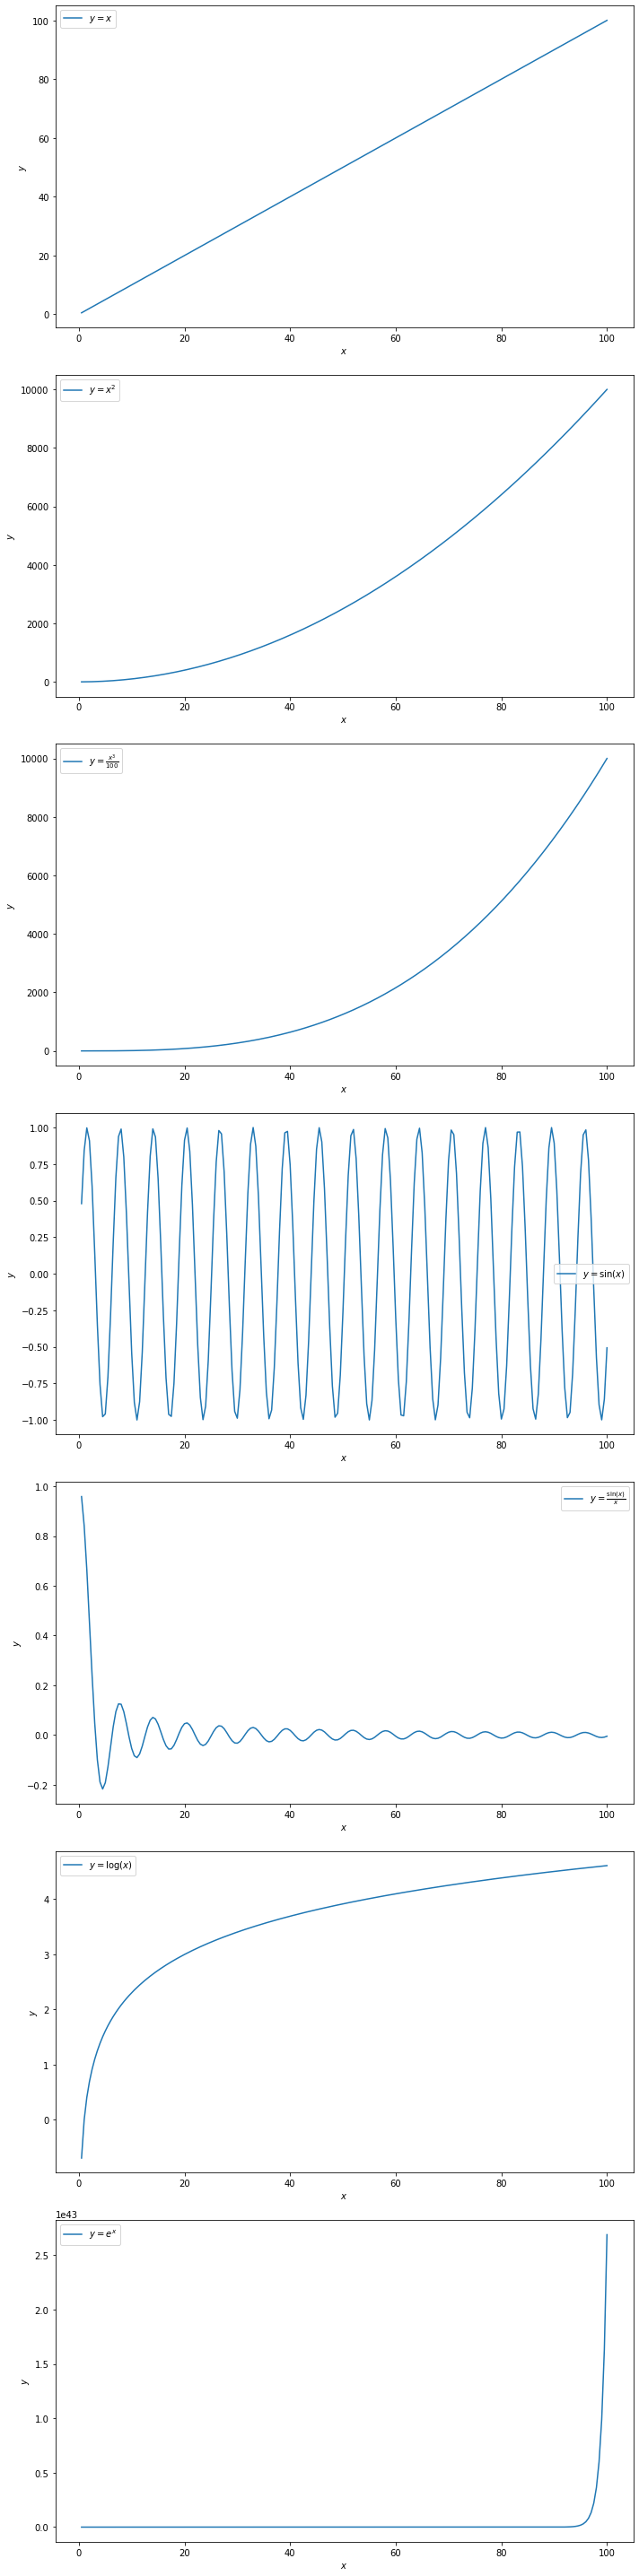

In [12]:
import matplotlib.pyplot as plt
import numpy as np

x_values = np.arange(0.5, 100.5, 0.5)

y1 = x_values
y2 = x_values**2
y3 = x_values**3 / 100
y4 = np.sin(x_values)
y5 = np.sin(x_values) / x_values
y6 = np.log(x_values)
y7 = np.exp(x_values)

fig, axs = plt.subplots(7, 1, figsize=(10, 40))

axs[0].plot(x_values, y1, label=r'$y = x$')
axs[1].plot(x_values, y2, label=r'$y = x^2$')
axs[2].plot(x_values, y3, label=r'$y = \frac{x^3}{100}$')
axs[3].plot(x_values, y4, label=r'$y = \sin(x)$')
axs[4].plot(x_values, y5, label=r'$y = \frac{\sin(x)}{x}$')
axs[5].plot(x_values, y6, label=r'$y = \log(x)$')
axs[6].plot(x_values, y7, label=r'$y = e^x$')

for i in range(7):
    axs[i].set_xlabel('$x$')
    axs[i].set_ylabel('$y$')
    axs[i].legend()

plt.tight_layout()
plt.show()


Q10) Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.



In [13]:
import numpy as np
import pandas as pd

random_matrix = np.random.uniform(1, 2, size=(20, 5))

df = pd.DataFrame(random_matrix, columns=['a', 'b', 'c', 'd', 'e'])

highest_std_column = df.std(axis=0).idxmax()
lowest_mean_row = df.mean(axis=1).idxmin()

print(df)
print("\n")
print("Column with the highest standard deviation:", highest_std_column)
print("Row with the lowest mean:", lowest_mean_row)


           a         b         c         d         e
0   1.905384  1.379302  1.120795  1.301577  1.083601
1   1.227416  1.786876  1.228324  1.144533  1.200551
2   1.885335  1.064906  1.855551  1.025358  1.679606
3   1.539637  1.449554  1.543654  1.771174  1.587394
4   1.701618  1.067733  1.328611  1.594644  1.179216
5   1.469213  1.588719  1.112540  1.491226  1.413701
6   1.629699  1.351541  1.056592  1.584983  1.049011
7   1.272820  1.400310  1.196739  1.311633  1.433377
8   1.016798  1.118648  1.064139  1.412327  1.810627
9   1.228359  1.437001  1.139285  1.105920  1.236268
10  1.492189  1.207788  1.210571  1.640855  1.493016
11  1.786199  1.589399  1.316289  1.560790  1.990176
12  1.214361  1.141283  1.357585  1.549085  1.298846
13  1.529194  1.455212  1.006558  1.139850  1.159627
14  1.265981  1.183086  1.423360  1.337156  1.487339
15  1.520798  1.464657  1.446405  1.031049  1.617150
16  1.473745  1.969041  1.083218  1.540148  1.749145
17  1.788237  1.305045  1.440181  1.059646  1.

Q11) Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [14]:
import numpy as np
import pandas as pd

random_matrix = np.random.uniform(1, 2, size=(20, 5))

df = pd.DataFrame(random_matrix, columns=['a', 'b', 'c', 'd', 'e'])

df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)

df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')

lt8_count = (df['g'] == 'LT8').sum()

std_lt8 = df.loc[df['g'] == 'LT8', 'f'].std()
std_gt8 = df.loc[df['g'] == 'GT8', 'f'].std()

print(df)
print("\nNumber of rows where 'g' is 'LT8':", lt8_count)
print("Standard deviation of 'f' where 'g' is 'LT8':", std_lt8)
print("Standard deviation of 'f' where 'g' is 'GT8':", std_gt8)


           a         b         c         d         e         f    g
0   1.542332  1.770412  1.663399  1.946676  1.998736  8.921554  GT8
1   1.115384  1.150073  1.342603  1.081020  1.168021  5.857100  LT8
2   1.906257  1.053702  1.867539  1.945247  1.024606  7.797351  LT8
3   1.742123  1.997705  1.376827  1.186631  1.643631  7.946916  LT8
4   1.142764  1.253652  1.197274  1.585437  1.343106  6.522233  LT8
5   1.168895  1.965959  1.653210  1.165509  1.732851  7.686423  LT8
6   1.759192  1.848410  1.625570  1.981479  1.102363  8.317014  GT8
7   1.784343  1.625562  1.220810  1.074859  1.565102  7.270675  LT8
8   1.687090  1.046959  1.975951  1.110192  1.505954  7.326147  LT8
9   1.250458  1.076232  1.548647  1.745788  1.133101  6.754226  LT8
10  1.137603  1.210064  1.888888  1.152733  1.770275  7.159562  LT8
11  1.953401  1.092557  1.979988  1.018436  1.890817  7.935200  LT8
12  1.064559  1.384794  1.122876  1.567613  1.446593  6.586434  LT8
13  1.543389  1.885853  1.782843  1.556075  1.26

Q12) Write a small piece of code to explain broadcasting in numpy.

In [15]:
import numpy as np

x = np.array([[1, 2, 3], [4, 5, 6]]) 
y = np.array([10, 20, 30]) 

result = x + y
print("Array x:")
print(x)
print("\nArray y:")
print(y)
print("\nResult of x + y:")
print(result)


Array x:
[[1 2 3]
 [4 5 6]]

Array y:
[10 20 30]

Result of x + y:
[[11 22 33]
 [14 25 36]]


Q13) Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [16]:
import numpy as np

def customArgmin(arr):
    minIndex = 0
    minValue = arr[0]

    for i in range(1, len(arr)):
        if arr[i] < minValue:
            minValue = arr[i]
            minIndex = i

    return minIndex

arr = np.array([4, 2, 7, 1, 9, 3])
resultCustom = customArgmin(arr)
resultNp = np.argmin(arr)

print("Custom argmin:", resultCustom)
print("NumPy argmin:", resultNp)


Custom argmin: 3
NumPy argmin: 3
